In [66]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
from tensorflow.examples.tutorials.mnist import input_data

In [68]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [69]:
tf.reset_default_graph() 

In [70]:
# DEFINE parameters
num_inputs = 10
neurons_hid1 = 5
neurons_hid2 = 3
neurons_hid3 = 1

learning_rate = 0.003

In [71]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [72]:
# TRANSPOSE OR PINV
tie_weight = tf.transpose #pinv

In [73]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [74]:
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
w1_ = tie_weight(w1)

In [ ]:
'''
## WEIGHTS DEFINATION
initializer = tf.variance_scaling_initializer()

w1 = tf.Variable(initializer([num_inputs, neurons_hid1]), dtype=tf.float32)
# w1 = tf.Variable(np.load('./save/weights/lw1.npy'))
w1_ = tie_weight(w1)

w2 = tf.Variable(initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w2_ = tie_weight(w2)

# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))

# hid_layer2 = act_func(tf.matmul(hid_layer1, w2))

# hid_layer1_= act_func(tf.matmul(hid_layer2, w2_))
output_layer = (tf.matmul(hid_layer1, w1_))
'''

In [75]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
act_func = lambda X:X #tf.nn.relu

In [76]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
output_layer = tf.matmul(hid_layer1, w1_)

In [77]:
# LOSS FUNCTIONS
# loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=X,logits=output_layer))

In [78]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1])

In [79]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [80]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: y_batch})

            training_loss = loss.eval(feed_dict={X: y_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/label_ae_3.ckpt")
            
            
            
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.11045192927122116
Epoch 1 Complete. Training Loss: 0.017541395500302315
Epoch 2 Complete. Training Loss: 0.006896788254380226
Epoch 3 Complete. Training Loss: 0.003574881237000227
Epoch 4 Complete. Training Loss: 0.002191245788708329
Epoch 5 Complete. Training Loss: 0.0014186359476298094
Epoch 6 Complete. Training Loss: 0.0009893054375424981
Epoch 7 Complete. Training Loss: 0.0007059051422402263
Epoch 8 Complete. Training Loss: 0.0005221861647441983
Epoch 9 Complete. Training Loss: 0.0003937579458579421
Epoch 10 Complete. Training Loss: 0.0003019399009644985
Epoch 11 Complete. Training Loss: 0.0002285156078869477
Epoch 12 Complete. Training Loss: 0.00017933548951987177
Epoch 13 Complete. Training Loss: 0.00013948955165687948
Epoch 14 Complete. Training Loss: 0.00011204553447896615
Epoch 15 Complete. Training Loss: 8.809883001958951e-05
Epoch 16 Complete. Training Loss: 7.287469634320587e-05
Epoch 17 Complete. Training Loss: 5.6167420552810654e-05
Epoc

In [81]:
num_test_labels = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/label_ae_3.ckpt")
    
    results,compressed = sess.run([tf.nn.softmax(output_layer), hid_layer1],
                                  feed_dict={X:mnist.test.labels[start_point:num_test_labels+start_point]})
    weight1 = w1.eval()

INFO:tensorflow:Restoring parameters from ./save/label_ae_3.ckpt


In [82]:
results.shape

(10, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


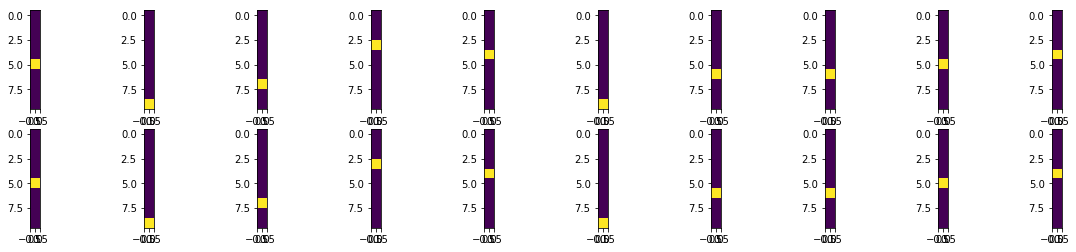

In [83]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_labels, figsize=(20, 4))
for i in range(start_point,num_test_labels+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.labels[i], (10, 1)))
    a[1][j].imshow(np.reshape(results[j], (10, 1)))
    print(mnist.test.labels[i])
    np.set_printoptions(precision=4, suppress=True)
    print(results[j])

In [84]:
weight1

array([[ 1.7071,  2.4307, -2.2346,  0.5107, -1.8471],
       [ 1.8039, -2.4401, -0.9451, -2.7398, -1.1674],
       [-1.7937,  2.4399,  0.9357,  2.7299,  1.1579],
       [ 2.264 , -0.8663,  2.5567,  2.0596, -1.5852],
       [-2.3048, -1.8807, -1.4455,  1.684 , -2.4051],
       [-1.7042, -2.4218,  2.2298, -0.5078,  1.8432],
       [-1.5418,  1.5675,  2.0579, -2.0793, -2.4424],
       [ 2.3127,  1.8954,  1.4426, -1.6857,  2.4045],
       [ 1.5455, -1.5576, -2.0646,  2.0822,  2.4382],
       [-2.2585,  0.8757, -2.5591, -2.055 ,  1.5782]], dtype=float32)

In [85]:
print(weight1.shape)
np.save('./save/weights/lw1.npy',weight1)
#wt1 = np.load('./save/weights/w1.npy')

(10, 5)
